In [1]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm

import matplotlib.pyplot as plt
import time
import pickle


from sklearn.feature_extraction.text import TfidfVectorizer #, TfidfTransformer
#TfidfVectorizer is used on sentences 
#TfidfTransformer is used on an existing count matrix, such as one returned by CountVectorizer
#Tfidfvectorizer - Equivalent to CountVectorizer followed by TfidfTransformer..
import spacy

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [155]:
def get_links(artist:str):    
    
    """Function, that returns a list of songs links of an artist (www.lyrics.com) """
    try:
        html=requests.get(f'https://www.lyrics.com/artist/{artist}').text  

        html_soup = BeautifulSoup(html, 'html.parser')

        link_list=[]
        for link in html_soup.find_all(attrs={"class":"tal qx"}):
            for link in link.find_all("a"):
                link=link.get('href')
                lyr_link='https://www.lyrics.com/'+link
            
                link_list.append(lyr_link)
        return link_list
    except:
        print("Connection refused by the server..")
        print("Let me sleep for 5 seconds")
        print("ZZzzzz...")
        time.sleep(10)

In [150]:
def get_lyrics(song_link:str): 
    """Function, that returns a string with song's lyrics (www.lyrics.com)"""
    
    string=''
    try:
        song_html=requests.get(song_link).text
        lyrics_soup = BeautifulSoup(song_html, 'html.parser')

        for section in lyrics_soup.find_all(attrs={"class":"lyric-body"}):
            text=section.text.split()
            for i in text:
                string+=i.lower()+' '
        return string
    except:
        print("Connection refused by the server..")
        print("Let me sleep for 5 seconds")
        print("ZZzzzz...")
        time.sleep(10)

    

In [104]:
eagles_links=get_links('eagles')       

In [152]:
eagles_lyrics=[]
for link in eagles_links:
    eagles_lyrics.append(get_lyrics(link))

Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...


In [156]:
scorpions_links=get_links('scorpions')       

In [157]:
scorpions_lyrics=[]
for link in scorpions_links:
    scorpions_lyrics.append(get_lyrics(link))

Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...


In [194]:
#removing None's that were created as a result of using time function while scaping
for i in eagles_lyrics:
    if i==None:
        eagles_lyrics.remove(i)

for i in scorpions_lyrics:
    if i==None:
        scorpions_lyrics.remove(i)

In [198]:
#saving pre spacy files
for element in eagles_lyrics:
      open("eagles_songs_prespacy.txt", "a+").write(element+"\n")

for element in scorpions_lyrics:
    open("scorpions_songs_prespacy.txt", "a+").write(element+"\n")

***Using Spacy to clean the data***

In [199]:


model = spacy.load('en_core_web_md')

In [8]:
def clean_my_string(string):
    """use spacy to tokenize, lemmatize and remove stop words"""
    clean_string = []
    token_string = model(string)
    for token in token_string:
        if not token.is_stop and not token.is_punct and not token.like_num:
            clean_string.append(token.lemma_)
    return ' '.join(clean_string)

In [201]:
clean_eagles=[]
for item in eagles_lyrics: 
    item=clean_my_string(item)
    clean_eagles.append(item)

In [224]:
clean_scorpions=[]
for item in scorpions_lyrics:   
    item=clean_my_string(item)
    clean_scorpions.append(item)

In [225]:
#checking the difference in length after spacy cleaning
print(len(eagles_lyrics[0]),len(clean_eagles[0]))
print(len(scorpions_lyrics[0]),len(clean_scorpions[0]))

777 484
1213 658


In [368]:
print(len(clean_eagles),len(clean_scorpions))

1305 2033


In [235]:
#saving to pickles

with open('clean_eagles.pickle', 'wb') as file:
    pickle.dump(clean_eagles,file)
with open('clean_scorpions.pickle', 'wb') as file:
    pickle.dump(clean_scorpions,file)    
    

In [97]:

#loading pickled files
with open('clean_eagles.pickle', 'rb') as f:
      clean_eagles = pickle.load(f)
with open('clean_scorpions.pickle', 'rb') as f:
      clean_scorpions = pickle.load(f)

In [173]:

df1=pd.DataFrame({'lyrics':clean_scorpions, 'artist':0})

In [174]:
df2=pd.DataFrame({'lyrics':clean_eagles, 'artist':1})

In [175]:
df=pd.concat([df1,df2])

In [176]:
df

,lyrics,artist
0,follow moskva gorky park listen wind change au...,0
1,follow moskva gorky park listen wind change au...,0
2,wise man say walk way dawn light wind blow fac...,0
3,bear sound string song feeling close eye try w...,0
4,time need time win love love love bring love s...,0
...,...,...
1300,baby stand little head hand oh god believe hap...,1
1301,dark desert highway cool wind hair warm smell ...,1
1302,baby stand little head hand oh god believe hap...,1
1303,dark desert highway cool wind hair warm smell ...,1


In [39]:
#saving df
pickle.dump(df, open('df.pkl',"wb"))

In [177]:
#reading saved df
df=pd.read_pickle('df.pkl')
df

,lyrics,artist
0,follow moskva gorky park listen wind change au...,0
1,follow moskva gorky park listen wind change au...,0
2,wise man say walk way dawn light wind blow fac...,0
3,bear sound string song feeling close eye try w...,0
4,time need time win love love love bring love s...,0
...,...,...
1300,baby stand little head hand oh god believe hap...,1
1301,dark desert highway cool wind hair warm smell ...,1
1302,baby stand little head hand oh god believe hap...,1
1303,dark desert highway cool wind hair warm smell ...,1


In [178]:
def clean_text_final(text):
    'remove words containing numbers'
    text = re.sub('\w*\d\w*', '', text)
    return text

In [179]:
df['lyrics'] = df['lyrics'].apply(clean_text_final)

In [180]:

#splitting the data
X,y=df['lyrics'],df['artist']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [182]:
X_train.shape,y_train.shape

((2503,), (2503,))

In [183]:
tf = TfidfVectorizer()

In [184]:
vectorized_lyrics=tf.fit_transform(X_train)  #creating sparse matrix
vectorized_lyrics

<2503x2542 sparse matrix of type '<class 'numpy.float64'>'
	with 108646 stored elements in Compressed Sparse Row format>

In [185]:
pickle.dump(tf,open('tf.pkl','wb'))   # saving for later use in Command-Line Interface

In [189]:
#transforming X_test
X_test_trans=tf.transform(X_test).toarray()

In [190]:
# converting sparse matrix into a dense matrix to view it effectively
tf_vectors=pd.DataFrame(vectorized_lyrics.todense().round(2), columns=tf.get_feature_names())  #index=X

In [191]:
tf_vectors

,aaaayowwww,aah,abel,able,acacia,accept,accountant,ace,ache,action,...,yore,york,you,youall,youi,young,zenith,zone,zoo,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57,0.0
2501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [113]:
def print_evaluations(X_test,y_test, model):
    """Model evaluation metrics"""
    y_pred=model.predict(X_test)

    print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 3)}')
    print(f'Precision: {round(precision_score(y_test, y_pred), 3)}')
    print(f'Recall: {round(recall_score(y_test, y_pred), 3)}')
    print(f'F1-score: {round(f1_score(y_test, y_pred), 3)}')
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues,display_labels=['Scorpions', 'Eagles'])
    
  

***Logreg***

In [192]:

model=LogisticRegression()
model.fit(tf_vectors,y_train)
print("Train score :",model.score(tf_vectors,y_train))

Train score : 0.9588493807431082


In [193]:
acc_log=round(model.score(X_test_trans,y_test),3) #saving for later model comparison

In [194]:
accuracy=cross_val_score(model,tf_vectors,y_train)
print("Cross-validation score :", accuracy.mean())

Cross-validation score : 0.9504590818363272


In [195]:
#testing one song
test_song=["I'm gettin' out of control oh,oh,oh she's cool water, her momma taught her I got news, she's"]
test=tf.transform(test_song)
print(model.predict(test))

[1]


Accuracy: 0.964
Precision: 0.996
Recall: 0.903
F1-score: 0.948


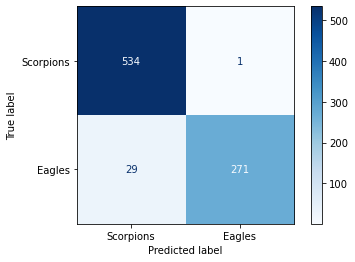

In [196]:
print_evaluations(X_test_trans, y_test, model)

***Naive Bayes***

In [66]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(tf_vectors,y_train)
print("Train score :",nb.score(tf_vectors,y_train))

Train score : 0.9536556132640831


In [67]:
acc_nb=round(nb.score(X_test_trans,y_test),3) #saving for later model comparison

In [68]:
accuracy=cross_val_score(nb,tf_vectors,y_train)
print("Cross-validation score :", accuracy.mean())

Cross-validation score : 0.9384726546906188


Accuracy: 0.953
Precision: 0.989
Recall: 0.88
F1-score: 0.931


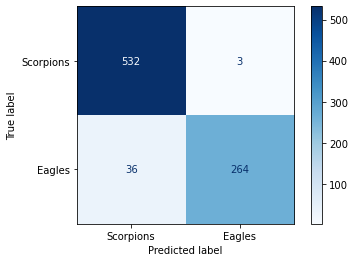

In [69]:
print_evaluations(X_test_trans, y_test, nb)

***SVM***

In [70]:
svm_clf=svm.SVC(kernel='linear')
svm_clf.fit(tf_vectors,y_train)
print("Train score :",svm_clf.score(tf_vectors,y_train))

Train score : 0.9792249300838993


In [71]:
acc_svm=round(svm_clf.score(X_test_trans,y_test),3) #saving for later model comparison

In [72]:
accuracy=cross_val_score(svm_clf,tf_vectors,y_train)
print("Cross-validation score :", accuracy.mean())

Cross-validation score : 0.9740319361277445


Accuracy: 0.984
Precision: 0.958
Recall: 1.0
F1-score: 0.979


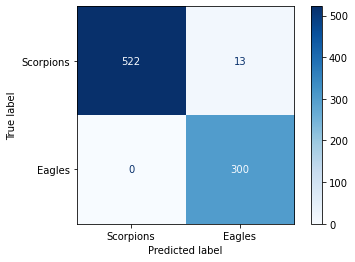

In [73]:
print_evaluations(X_test_trans, y_test, svm_clf)

***RandomForest***

In [114]:
forest = RandomForestClassifier()

In [75]:
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm

In [83]:
#searching for best max_depth
forest_params = {"max_depth": range(50,70)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, verbose=True)

forest_grid.fit(tf_vectors,y_train)

forest_grid.best_params_, forest_grid.best_score_ 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'max_depth': 58}, 0.9800247504990018)

In [115]:
forest = RandomForestClassifier(n_estimators=100, max_depth=58)

In [116]:
forest.fit(tf_vectors,y_train)
print("Train score :",forest.score(tf_vectors,y_train))

Train score : 0.9804234918098282


In [117]:
pickle.dump(forest, open('rf_clf.pkl', 'wb')) # saving for later use in Command-Line Interface

In [86]:
acc_rf=round(forest.score(X_test_trans,y_test),3)  #saving for later model comparison

In [87]:
accuracy=cross_val_score(forest,tf_vectors,y_train)
print("Cross-validation score :", accuracy.mean())

Cross-validation score : 0.9788255489021956


Accuracy: 0.986
Precision: 0.965
Recall: 0.997
F1-score: 0.98


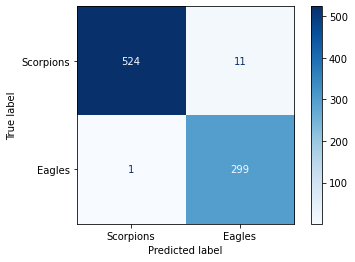

In [88]:
print_evaluations(X_test_trans, y_test, forest)

***Model comparison***

In [89]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 'Support Vector Machine', 'Random Forest'],
    
    'Score': [acc_log, acc_nb, acc_svm, acc_rf]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.986
2,Support Vector Machine,0.984
0,Logistic Regression,0.964
1,Naive Bayes,0.953


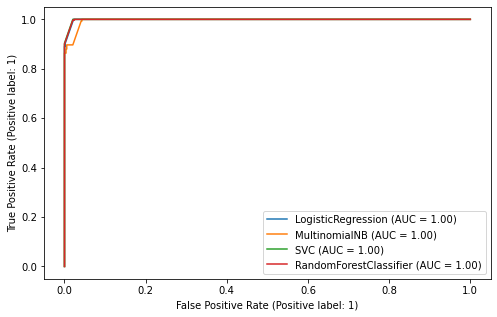

In [90]:
from sklearn import metrics
fig, axes = plt.subplots(1,1, figsize=(8,5))
metrics.plot_roc_curve(model, X_test_trans, y_test, ax=axes)
metrics.plot_roc_curve(nb, X_test_trans, y_test, ax=axes)
metrics.plot_roc_curve(svm_clf, X_test_trans, y_test,ax=axes)
metrics.plot_roc_curve(forest, X_test_trans, y_test, ax=axes)